In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency 

In [3]:
d = pd.read_excel('D:/AVI/Assignments/Stats - Assignment 1 -/Assignment_Batch7_stats.xlsx',skiprows =18)
d.head()

,Serial number,Age (yrs),Gender,Occupation,Site of death,Time of death,"Alco,Drug etc",Use of helmet,Type of vehicle,Period of coma (hrs),Person died,Unnamed: 11,Unnamed: 12
0,1,24,Male,Bussinesman,On the way,After 1 hour,Yes,No,Scooter,1.0,Rider,NaN,NaN
1,2,63,Male,Retired Person,Hospital,After 120 hours,Yes,No,Scooty,120.0,Rider,NaN,NaN
2,3,23,Female,Student,Spot,Immediately,Yes,No,Scooter,NaN,Pillion,NaN,NaN
3,4,41,Female,Student,Hospital,After 144 hours,Yes,Na,Kinetic Honda,144.0,Rider,NaN,NaN
4,5,25,Male,Employee,Hospital,After 192 hours,Yes,Yes,RX 100,192.0,Rider,NaN,NaN


In [127]:
d.shape

(50, 13)

In [125]:
d.describe()

,Serial number,Age (yrs),Period of coma (hrs),Unnamed: 11,Unnamed: 12
count,50.00000,50.000000,25.000000,0.0,0.0
mean,25.50000,31.640000,105.200000,NaN,NaN
std,14.57738,15.372597,112.339144,NaN,NaN
min,1.00000,5.000000,1.000000,NaN,NaN
25%,13.25000,22.000000,5.000000,NaN,NaN
50%,25.50000,31.500000,72.000000,NaN,NaN
75%,37.75000,39.750000,144.000000,NaN,NaN
max,50.00000,72.000000,384.000000,NaN,NaN


In [128]:
d.columns

Index(['Serial number', 'Age (yrs)', 'Gender', 'Occupation', 'Site of death',
       'Time of death', 'Alco,Drug etc', 'Use of helmet', 'Type of vehicle',
       'Period of coma (hrs)', 'Person died', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

##### Q1 - How many children (<= 18 years) have died in the accident and how many of them are males and females?

In [4]:
d[d['Age (yrs)'] <= 18].groupby('Gender')['Gender'].count()

Gender
Female    2
Male      6
Name: Gender, dtype: int64

##### Q2 - How many children had taken alcohol? Were they riders or pillion when they died? 

In [8]:
print(d[(d['Age (yrs)'] <= 18) & (d['Alco,Drug etc'] =='Yes')]['Person died'].count())
print(d[(d['Age (yrs)'] <= 18) & (d['Alco,Drug etc'] =='Yes')].groupby('Person died')['Person died'].count())

3
Person died
Pillion    2
Rider      1
Name: Person died, dtype: int64


##### Q3 - How many children have died immediately in the accident as pillion riders who had consumed alcolhol? 

In [162]:
d[(d['Age (yrs)'] <= 18) & (d['Time of death'] =='Immediately') & (d['Person died'] == 'Pillion' ) & (d['Alco,Drug etc'] =='Yes')]['Gender'].count()

2

##### Q4 - How many have died under the influence of alcohol/drug and without wearing helmet?

In [165]:
d[(d['Alco,Drug etc']  =='Yes') & (d['Use of helmet'] == 'No')]['Person died'].count()

19

##### Q5 - How many of them have died between the age group of 31 - 40 years inspite of wearing helmet? 

In [49]:
d[(d['Age (yrs)']>=31) & (d['Age (yrs)']<=40) & (d['Use of helmet'] == 'Yes')]['Person died'].count()

2

##### Q6 - What is the ratio of male and female who died on the spot? 

In [69]:
d[d['Site of death'] == 'Spot'].groupby('Gender')['Gender'].count()

Gender
Female     5
Male      14
Name: Gender, dtype: int64

In [ ]:
# Ratio M:F = 14:5

##### Q7 - Whai is the medianal survival time  and IQR of RTA victims who died in the hospital? 

In [86]:
d['Period of coma (hrs)'].median()

72.0

In [56]:
q1 =d[d['Site of death'] =='Hospital']['Period of coma (hrs)'].quantile(0.25)
q2 =d[d['Site of death'] =='Hospital']['Period of coma (hrs)'].quantile(0.75)
iqr = q2-q1
iqr


150.25

##### Q8 - How many of them have died in the hospital for whom wearing of helmet details not available? Do you think these people could have wore helmet at the time of accident?

In [14]:
d[(d['Site of death']== 'Hospital') & (d['Use of helmet']== 'Na')]['Person died'].count()

6

In [28]:
d[(d['Site of death']== 'Hospital') & (d['Use of helmet']== 'No')]['Person died'].count()

17

In [29]:
d[(d['Site of death']== 'Hospital') & (d['Use of helmet']== 'Yes')]['Person died'].count()

2

In [30]:
d[(d['Site of death']== 'Hospital')]['Person died'].count()

25

In [ ]:
# Do you think these people could have wore helmet at the time of accident?
No ## as the probabilty of person not wearing helmet is more as compared to person wearing helmet

##### Q9 - What is the medianal period of coma (hrs) and IQR of RTA victims who died in the hospital? 

In [15]:
d['Period of coma (hrs)'].median()

72.0

In [16]:
q1 =d[d['Site of death'] =='Hospital']['Period of coma (hrs)'].quantile(0.25)
q2 =d[d['Site of death'] =='Hospital']['Period of coma (hrs)'].quantile(0.75)
iqr = q2-q1
iqr

150.25

##### Q10 - What is the ratio of students to bussinessmen who died in RTA under the influence of alcohol? 

In [63]:
d[(d['Occupation'] == 'Bussinesman') & (d['Alco,Drug etc'] == 'Yes')]['Person died'].count()

5

In [64]:
d[(d['Occupation'] == 'Student') & (d['Alco,Drug etc'] == 'Yes')]['Person died'].count()

6

In [ ]:
# Ratio - Students:Businessman = 5:6

##### Q11 - State some of the hypothesis which may be formulated based on this data?  And test these hypothesis 

In [31]:
# H0 : Alcohol and Use of helmet is independent of each other
# H1 : Alcohol and Use of helmet is dependent of each other

##### Q12 - Is there sufficient data to test these hypothesis? If so use the available and test those hypothesis. 

In [ ]:
# YES

In [32]:
d['Alco,Drug etc'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
d['Use of helmet'].unique()

array(['No', 'Na', 'Yes'], dtype=object)

In [35]:
tble = pd.crosstab(index=d['Alco,Drug etc'],columns=d['Use of helmet'])
tble

Use of helmet,Na,No,Yes
"Alco,Drug etc",,,
No,7,18,2
Yes,3,19,1


In [36]:
from scipy.stats import chi2_contingency 
chi2_contingency(tble)

(1.6509262886074478, 0.4380320734185241, 2, array([[ 5.4 , 19.98,  1.62],
        [ 4.6 , 17.02,  1.38]]))

In [ ]:
# chi-square statistic - 1.6509262886074478 , p-value = 0.4380320734185241
# Since the p value > aplha value 
# Thus we will accept H0

#####  Q13 - Use appropriaate graphs to present the data

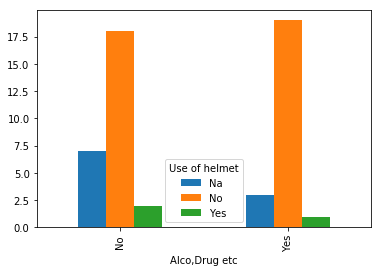

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt 
tble.plot(kind='bar')
#plt.bar(dDrug etc'],x)

##### Q14 -What are the different types of vehicles used? 

In [39]:
d['Type of vehicle'].unique()

array(['Scooter', 'Scooty', 'Kinetic Honda', 'RX 100', 'Hero Honda',
       'TVS Suzuki', 'Yezdi', 'TVS 50'], dtype=object)

##### Q15 - Considering 0 for survival of Rider and 1 for death fit a Logistic regression model for the data by treating all other variables has explanatory variables

In [50]:
d.head()

,Serial number,Age (yrs),Gender,Occupation,Site of death,Time of death,"Alco,Drug etc",Use of helmet,Type of vehicle,Period of coma (hrs),Person died,Unnamed: 11,Unnamed: 12
0,1,24,Male,Bussinesman,On the way,After 1 hour,Yes,No,Scooter,1.0,Rider,NaN,NaN
1,2,63,Male,Retired Person,Hospital,After 120 hours,Yes,No,Scooty,120.0,Rider,NaN,NaN
2,3,23,Female,Student,Spot,Immediately,Yes,No,Scooter,NaN,Pillion,NaN,NaN
3,4,41,Female,Student,Hospital,After 144 hours,Yes,Na,Kinetic Honda,144.0,Rider,NaN,NaN
4,5,25,Male,Employee,Hospital,After 192 hours,Yes,Yes,RX 100,192.0,Rider,NaN,NaN
